# Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.

In label encoding in Python, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4).

An Ordinal Encoder is used to encode categorical features into an ordinal numerical value (ordered set). This approach transforms categorical value into numerical value in ordered sets.

This encoding technique appears almost similar to Label Encoding. But, label encoding would not consider whether a variable is ordinal or not, but in the case of ordinal encoding, it will assign a sequence of numerical values as per the order of data.

When NOT to use Ordinal Encoder:
If the data you are working and trying to interpret has numerical significance, you will most likely not need to use ordinal encoder, or any encoder for that matter. If you can already take the mean, median, mode of your data that provides insight, you’re in luck and won’t need to encode the data.

Ordinal encoder also should not be used if your data has no meaningful order. Going back to the car color example, there is no way to logically order these colors from smallest to largest or worst to best. When working with nominal data, OneHotEncoder or LabelEncoder should do the trick depending on what you need. OneHotEncoder is used with the features/variables, while LabelEncoder is used for the target variables.

In [ ]:
You can encode multiple columns at once using OrdinalEncoder, while LabelEncoder can handle only one column.

In [ ]:
Ordinal Encoding:
When we have a feature where variables have some order/rank.

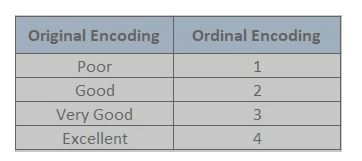

To understand label encoding with an example, let us take COVID-19 cases in India across states. If we observe the below data frame, the State column contains a categorical value that is not very machine-friendly and the rest of the columns contain a numerical value. Let us perform Label encoding for State Column.

From the below image, after label encoding, the numeric value is assigned to each of the categorical values. You might be wondering why the numbering is not in sequence (Top-Down), and the answer is that the numbering is assigned in alphabetical order. Delhi is assigned 0 followed by Gujarat as 1 and so on.

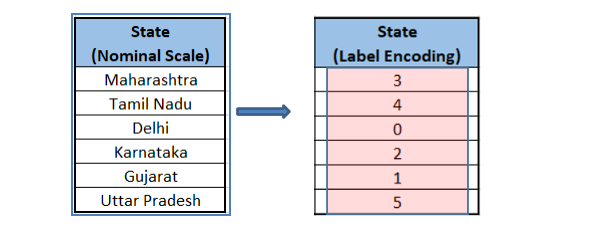

# Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.

It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [1]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [2]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [5]:
df.groupby('city')['price'].mean()

city
London      150.0
New York    190.0
Paris       310.0
Tokyo       250.0
Name: price, dtype: float64

In [6]:
df.groupby('city')['price'].mean().to_dict()

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [7]:
mean_price=df.groupby('city')['price'].mean().to_dict()

In [8]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [14]:
df['city_encoded']=df['city'].map(mean_price)

In [15]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [16]:
df[['price','city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0


In [ ]:
# Another example:

In [1]:
import seaborn as sns
df2=sns.load_dataset('tips')

In [2]:
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# convert time based on total_bill
df2.groupby('time')['total_bill'].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

In [6]:
df2.groupby('time')['total_bill'].mean().to_dict()

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [7]:
mean_totalbill=df2.groupby('time')['total_bill'].mean().to_dict()

In [9]:
df2['time_encoded']=df2['time'].map(mean_totalbill)

In [10]:
df2

,total_bill,tip,sex,smoker,day,time,size,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159


In [11]:
# convert sex based on total_bill
df2.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [12]:
mean_sex=df2.groupby('sex')['total_bill'].mean()

In [13]:
df2['sex_encoded']=df2['sex'].map(mean_sex)

In [14]:
df2

,total_bill,tip,sex,smoker,day,time,size,time_encoded,sex_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159,18.056897
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159,20.744076
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159,20.744076
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159,20.744076
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159,18.056897
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159,20.744076
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159,18.056897
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159,20.744076
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159,20.744076


# Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

Covariance and variance are used to measure the distribution of points in a data set. However, variance is typically used in data sets with only one variable and indicates how closely those data points are clustered around the average.
Covariance measures the direction of the relationship between two variables. 
A positive covariance means that both variables tend to be high or low at the same time.
A negative covariance means that when one variable is high, the other tends to be low.

Covariance is a measure of how much two random variables vary together. 
It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

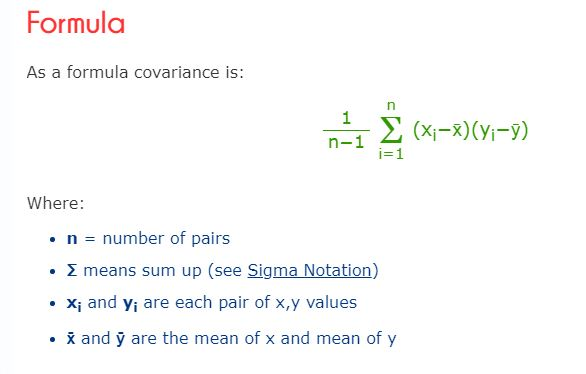

# Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium, large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library.Show your code and explain the output.

In [28]:
import pandas as pd
df3=pd.DataFrame({ 'color':['red','green','blue'],
                    'size':['small','medium','large'],
                'material':['wood','metal','plastic']
                 })

In [29]:
df3

,color,size,material
0,red,small,wood
1,green,medium,metal
2,blue,large,plastic


In [33]:
df3.dtypes

color       object
size        object
material    object
dtype: object

In [30]:
df3['color'].unique()

array(['red', 'green', 'blue'], dtype=object)

In [31]:
df3['color'].value_counts()

red      1
green    1
blue     1
Name: color, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [42]:
df3['color']=label_encoder.fit_transform(df3[['color']])
df3['size']=label_encoder.fit_transform(df3[['size']])
df3['material']=label_encoder.fit_transform(df3[['material']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
df3

,color,size,material
0,2,2,2
1,1,1,0
2,0,0,1


In [36]:
df3.dtypes

color       int64
size        int64
material    int64
dtype: object

In [38]:
df3['color'].unique()

array([2, 1, 0])

In [40]:
df3['color'].value_counts()

2    1
1    1
0    1
Name: color, dtype: int64

# Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education level. Interpret the results.

In [10]:
df5=pd.DataFrame({
                'Age':(17,21,26,35),
                'Income':(10000,20000,30000,70000),
                'Education Level':('12th','BA','MA','PhD')
})

In [11]:
df5

,Age,Income,Education Level
0,17,10000,12th
1,21,20000,BA
2,26,30000,MA
3,35,70000,PhD


In [12]:
df5.cov()

/tmp/ipykernel_91/2807582726.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5.cov()


,Age,Income
Age,60.250000,2.008333e+05
Income,200833.333333,6.916667e+08


In [14]:
import numpy as np
np.cov(df5['Age'],df5['Income'])

array([[6.02500000e+01, 2.00833333e+05],
       [2.00833333e+05, 6.91666667e+08]])

# Q6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?

In [ ]:
For Gender- Use Label encoding because there is no order
For Education Level-Use ordinal encoder because we can assign order according to education
For Employment status:-Use ordinal encoder because we can assign order

# Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/ East/West). Calculate the covariance between each pair of variables and interpret the results.

In [3]:
import pandas as pd
df7=pd.DataFrame({
                'Temp':(10,20,30,40),
                'Humidity':(5,6,7,8),
                'Weather Condition':('Sunny','cloudy','Rainy','Sunny'),
                'Wind Direction':('North','South','East','West')


})

In [6]:
df7


,Temp,Humidity,Weather Condition,Wind Direction
0,10,5,Sunny,North
1,20,6,cloudy,South
2,30,7,Rainy,East
3,40,8,Sunny,West


In [7]:
df7.cov()

/tmp/ipykernel_91/2264162512.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df7.cov()


,Temp,Humidity
Temp,166.666667,16.666667
Humidity,16.666667,1.666667


In [ ]:
it shows positive covariance b/w temp and humidity.

In [8]:
df7.corr()

/tmp/ipykernel_91/2906877236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df7.corr()


,Temp,Humidity
Temp,1.0,1.0
Humidity,1.0,1.0


In [9]:
df7.corr(method='spearman')

/tmp/ipykernel_91/2849105655.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df7.corr(method='spearman')


,Temp,Humidity
Temp,1.0,1.0
Humidity,1.0,1.0
